In [ ]:
import numpy as np
import pandas as pd

***
# WEEK 2.2
***
Importing and Normalizing Data


In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv -O data.csv

--2022-06-18 20:07:46--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.07s   

2022-06-18 20:07:46 (21.6 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [3]:
df = pd.read_csv('data.csv')

***
Viewing the data after downloading


In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


***
Normalizing the columns to be without spaces for easier accessing

In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')

***
Identifying non-numerical/non-boolean values as strings(objects) and normalizing their values

In [6]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [7]:
string_cols = list(df.dtypes[df.dtypes == 'object'].index)

In [8]:
for col in string_cols:
    df[col] = df[col].str.lower().str.replace(' ','_')

***
# WEEK 2.3

***

Exploratory Data Analysis

In [9]:
for col in df.columns:
    print(df[col].unique()[:5])
    print(df[col].nunique(),'\n')

['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48 

['1_series_m' '1_series' '100' '124_spider' '190-class']
914 

[2011 2012 2013 1992 1993]
28 

['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10 

[335. 300. 230. 320. 172.]
356 

[ 6.  4.  5.  8. 12.]
9 

['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5 

['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4 

[ 2.  4.  3. nan]
3 

['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71 

['compact' 'midsize' 'large']
3 

['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16 

[26 28 27 25 24]
59 

[19 20 18 17 16]
69 

[3916 3105  819  617 1013]
48 

[46135 40650 36350 29450 34500]
6049 



Import visualization packages

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
%matplotlib inline

Histogram to view price distribution using the MSRP column

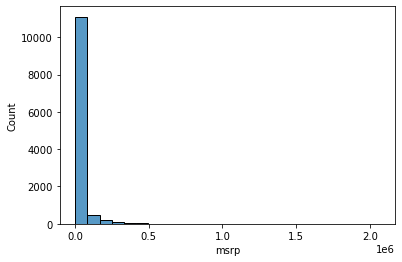

In [12]:
hist = sns.histplot(df['msrp'], bins = 25)
plt.show()

It is clear that there is a right skew in the data.
The distribution of prices isn't normal and therefore, not ideal for ML

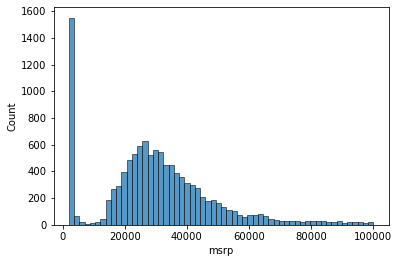

In [13]:
df_MSRP_less_than_100k = df[df['msrp']<100000]
sns.histplot(df_MSRP_less_than_100k['msrp'])
plt.show()

Distribution with msrp less than $100000 is more normal than the original dataset

***
Using np.log1p() to bring the scale smaller to verify normalization of data through histogram visualization

In [14]:
prices_under_100k_log = np.log1p(df_MSRP_less_than_100k['msrp'])

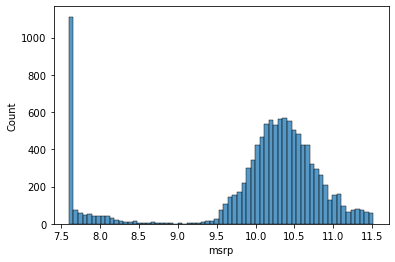

In [15]:
sns.histplot(prices_under_100k_log)
plt.show()

Removing missing values

In [16]:
df_MSRP_less_than_100k.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              65
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         4
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

***
# WEEK 2.4

***

Validation Framework

Setting up train, validate, and test dataframes from the normalized dataset

In [17]:
# setting size to the length of the dataframe
size = len(df)

In [18]:
# randomizing index values
index = np.arange(size)
np.random.seed(95)
np.random.shuffle(index)

In [19]:
# setting the range of data for the train dataframe with random index values
train = range(0,int(0.6 * size-1))
train_index = []
for x in train:
    train_index.append (index[x])

#print(len(train_index))

In [20]:
# setting the range of data for the validate dataframe with random index values

validate = range(int(0.6*size),int(0.8*size-1))
validate_index = []
for x in validate:
    validate_index.append (index[x])

#print(len(validate_index))

In [21]:
# setting the range of data for the test dataframe with random index values

test = range(int(0.8*size),size-1)
test_index = []
for x in test:
    test_index.append (index[x])

#print(len(test_index))

Setting the indices that each dataframe will contain

In [22]:
df_train = df.iloc[train_index]
df_validate = df.iloc[validate_index]
df_test = df.iloc[test_index]

***
Reseting index after shuffling indexes for each dataframe


In [23]:
df_train = df_train.reset_index(drop = True)
df_validate = df_validate.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [24]:
log_train_MSRP = np.log1p(df_train['msrp'])
log_validate_MSRP = np.log1p(df_validate['msrp'])
log_test_MSRP = np.log1p(df_test['msrp'])

In [25]:
log_train_MSRP

0       12.291750
1       10.764921
2        9.903037
3        9.608848
4       11.064386
          ...    
7142     7.601402
7143     8.051341
7144    10.184749
7145    10.463132
7146    10.379908
Name: msrp, Length: 7147, dtype: float64

In [26]:
log_validate_MSRP

0       10.312812
1       11.015362
2       10.122462
3       10.180968
4        7.601402
          ...    
2377    10.094149
2378    10.493799
2379    12.376874
2380     7.601402
2381    10.342903
Name: msrp, Length: 2382, dtype: float64

In [27]:
log_test_MSRP

0        7.601402
1        7.845808
2       10.788308
3       10.840972
4        7.601402
          ...    
2377    10.460127
2378    10.512193
2379    11.033292
2380     9.998616
2381    10.244094
Name: msrp, Length: 2382, dtype: float64

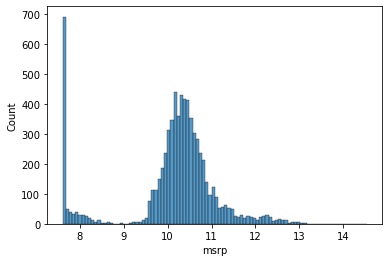

In [28]:
sns.histplot(log_train_MSRP)
plt.show()

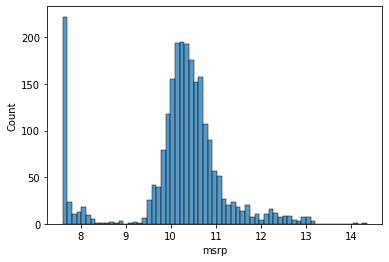

In [29]:
sns.histplot(log_validate_MSRP)
plt.show()

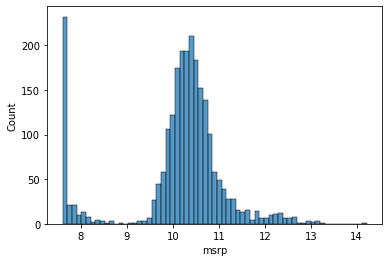

In [30]:
sns.histplot(log_test_MSRP)
plt.show()

***
# WEEK 2.5

***

Linear Regression Basics

Testing out linear regression on a row of the train dataframe

In [31]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,ferrari,575m,2003,premium_unleaded_(required),515.0,12.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,15,9,2774,217890
1,ford,expedition,2016,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,NaN,large,4dr_suv,20,14,5657,47330
2,honda,civic,2015,regular_unleaded,143.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,39,30,2202,19990
3,kia,spectra,2008,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,30,23,1720,14895
4,chevrolet,corvette,2016,premium_unleaded_(recommended),455.0,8.0,manual,rear_wheel_drive,2.0,high-performance,compact,convertible,29,17,1385,63855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7142,dodge,ram_150,1991,regular_unleaded,125.0,6.0,unknown,rear_wheel_drive,2.0,NaN,large,regular_cab_pickup,17,12,1851,2000
7143,audi,cabriolet,1998,regular_unleaded,172.0,6.0,automatic,front_wheel_drive,2.0,luxury,compact,convertible,22,17,3105,3137
7144,mazda,3,2016,regular_unleaded,184.0,4.0,automatic,front_wheel_drive,4.0,"hatchback,performance",compact,4dr_hatchback,37,27,586,26495
7145,infiniti,qx50,2015,premium_unleaded_(recommended),325.0,6.0,automatic,rear_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,25,17,190,35000


In [32]:
df_train.iloc[10]

make                          plymouth
model                             colt
year                              1994
engine_fuel_type      regular_unleaded
engine_hp                        113.0
engine_cylinders                   4.0
transmission_type               manual
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                   compact
vehicle_style                    sedan
highway_mpg                         30
city_mpg                            23
popularity                         535
msrp                              2000
Name: 10, dtype: object

In [33]:
feature_matrix_columns = ['engine_hp','city_mpg','popularity']
target_vector = ['msrp']
ascii

<function ascii(obj, /)>

In [34]:
df_train.iloc[10][feature_matrix_columns]

engine_hp     113.0
city_mpg         23
popularity      535
Name: 10, dtype: object

In [35]:
df_train.iloc[10][target_vector]

msrp    2000
Name: 10, dtype: object

In [36]:
#initial_condition 
w0 = 7.17
#slope_conditions AKA weight values for each feature
w = [0.01,0.04,0.002]

In [37]:
slope_conditions = w

Creating linear regression function

In [38]:
# xi is feature or features of interest and is a vector
# w0 is the initial condition
# w is the weight of each feature in the feature matrix in the form of a vector that coincides with the feature vector
# w is also the slope conditions from above
# pred is the prediction value at a given coordinate

def linear_regression_func(xi):
    n = len(xi)
    pred = w0
    
    for j in range(n):
        pred = pred + w[j]*xi[j]
    
    return pred

In [39]:
log_res = linear_regression_func(df_train.iloc[10][feature_matrix_columns])

In [40]:
np.expm1(log_res)

29435.77435223255

***
# WEEK 2.6

***

Linear Regression Vector Form

In [41]:
# xi is the feature matrix
# w is the weighting on each feature
def dot_product(xi,w):
    n = len(xi)
    result = 0
    
    for j in range(n):
        result += result + xi[j] * w[j]
    
    return result

In [42]:
w_new = [w0] + w

In [43]:
def linear_regression(xi):
    xi = [1] + xi
    return dot_product(xi, w_new)

In [44]:
linear_regression(df_train.iloc[10][feature_matrix_columns])

3291.44

Performing linear regression on multiple rows of data from the dataframe

In [45]:
# X; [x1,x2,x10] is a sample list of lists containing values from the train dataframe
x1 = [1] + list(df_train.iloc[1][feature_matrix_columns])
x2 = [1] + list(df_train.iloc[2][feature_matrix_columns])
x10 = [1] + list(df_train.iloc[10][feature_matrix_columns])


In [46]:
X = [x1,x2,x10]
X = np.array(X)

In [47]:
X

array([[1.000e+00, 3.650e+02, 1.400e+01, 5.657e+03],
       [1.000e+00, 1.430e+02, 3.000e+01, 2.202e+03],
       [1.000e+00, 1.130e+02, 2.300e+01, 5.350e+02]])

In [48]:
def linear_regression_matrix(X):
    return X.dot(w_new)

In [49]:
linear_regression_matrix(X)

array([22.694, 14.204, 10.29 ])

In [50]:
X

array([[1.000e+00, 3.650e+02, 1.400e+01, 5.657e+03],
       [1.000e+00, 1.430e+02, 3.000e+01, 2.202e+03],
       [1.000e+00, 1.130e+02, 2.300e+01, 5.350e+02]])

***
# WEEK 2.7

***

Training Linear Regression: Normal Equation

In [51]:
y = [10000,20000,15000,20050,10000,20000,15000,25000,12000]

In [52]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    #print('ones:',ones.shape)
    
    #print('X:',X.shape)

    #print('X.t:',X.T.shape)
    
    #print('X.t dot X:',X.T.dot(X).shape)
    
    #print('y:',y.shape)
    XTX = X.T.dot(X)
    inv_XTX = np.linalg.inv(XTX)
    w_full = inv_XTX.dot(X.T).dot(y)
    
    w0 = w_full[0]
    w = w_full[1:]
    #print(w)
    #print(w.shape)
    return w0,w

### Equations


- x is the values for each feature per row
- X is the set of rows that form a matrix
- w0 is the initial value without taking features into account
- w(1),w(2),...,w(n) are the weights for each feature
- y is the target value for the row or set of rows (matrix)

        XW = y

        X^T (XW) = X^T (y)

        (X^T X)^-1 X^T (XW) = (X^T X)^-1 X^T (y)

        IW = W =  (X^T X)^-1 (X^T) (y)

        W = X^T X * X^T * y

This section is directed at learning how to calculate the weights to best fit the linear regression technique

In [53]:
X = [[148,24,1385],
     [132,25,2031],
     [453,11,86],
     [158,24,1385],
     [172,25,2031],
     [413,11,86],
     [38,54,185],
     [132,25,431],
     [453,31,86]
    ]
X = np.array(X)

ones = np.ones(X.shape[0])
X = np.column_stack([ones,X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.320e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [54]:
X.shape

(9, 4)

In [55]:
XTX = X.T.dot(X)

In [56]:
XTX_inv = np.linalg.inv(XTX)

In [57]:
y = [100,200,150,250,100,200,150,250,120]

In [58]:
w_full = XTX_inv.dot(X.T).dot(y)

In [59]:
w_full

array([ 3.95818750e+02, -3.79700956e-01, -3.86519131e+00, -4.62473974e-02])

In [60]:
w[0] = w_full[0]
w = w_full[1:]

In [61]:
w


array([-0.37970096, -3.86519131, -0.0462474 ])

In [63]:
w0, w = train_linear_regression(X,y)

LinAlgError: Singular matrix

In [64]:
w0

7.17

In [65]:
w

array([-0.37970096, -3.86519131, -0.0462474 ])

***
# WEEK 2.8

***

Baseline Model for Car Price Prediction

In [66]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,ferrari,575m,2003,premium_unleaded_(required),515.0,12.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,15,9,2774,217890
1,ford,expedition,2016,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,NaN,large,4dr_suv,20,14,5657,47330
2,honda,civic,2015,regular_unleaded,143.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,39,30,2202,19990
3,kia,spectra,2008,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,30,23,1720,14895
4,chevrolet,corvette,2016,premium_unleaded_(recommended),455.0,8.0,manual,rear_wheel_drive,2.0,high-performance,compact,convertible,29,17,1385,63855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7142,dodge,ram_150,1991,regular_unleaded,125.0,6.0,unknown,rear_wheel_drive,2.0,NaN,large,regular_cab_pickup,17,12,1851,2000
7143,audi,cabriolet,1998,regular_unleaded,172.0,6.0,automatic,front_wheel_drive,2.0,luxury,compact,convertible,22,17,3105,3137
7144,mazda,3,2016,regular_unleaded,184.0,4.0,automatic,front_wheel_drive,4.0,"hatchback,performance",compact,4dr_hatchback,37,27,586,26495
7145,infiniti,qx50,2015,premium_unleaded_(recommended),325.0,6.0,automatic,rear_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,25,17,190,35000


In [67]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [68]:
base  = ['engine_hp','engine_cylinders', 'highway_mpg','city_mpg','popularity']

In [69]:
#base = df_train.select_dtypes(['int','float']).columns
#base

In [70]:
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,515.0,12.0,15,9,2774
1,365.0,6.0,20,14,5657
2,143.0,4.0,39,30,2202
3,138.0,4.0,30,23,1720
4,455.0,8.0,29,17,1385
...,...,...,...,...,...
7142,125.0,6.0,17,12,1851
7143,172.0,6.0,22,17,3105
7144,184.0,4.0,37,27,586
7145,325.0,6.0,25,17,190


Creating the X matrix for the linear regression function

In [71]:
X_train = df_train[base].fillna(0).values

In [72]:
y_train = np.array(df_train['msrp'])

In [73]:
y_train.shape

(7147,)

In [74]:
X_train.shape

(7147, 5)

In [75]:
w0, w = train_linear_regression(X_train,y_train)

In [76]:
y_pred = np.array(w0 + X_train.dot(w))

In [77]:
for x in range(len(y_pred)):
    if y_pred[x] < 0:
        y_pred[x] = np.nan


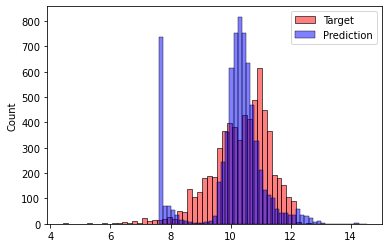

In [78]:
sns.histplot(np.log1p(y_pred),color = 'r', bins = 50, alpha = 0.5, label = 'Target')
sns.histplot(np.log1p(y_train), color = 'b', bins = 50 ,  alpha = 0.5, label = 'Prediction')

plt.legend()
plt.show()

***
# WEEK 2.9

***

Root Mean Square Error

RMSE is the square root of the sum of differences squared divded by the number of differences

In [79]:
# y_pred is the prediction
# y_train is the actual value
def rmse (actual,pred):
    error = actual - pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [80]:
rmse(y_train,y_pred)

nan

***
# WEEK 2.10

***

Computing RMSE on Validation Data

In [81]:
base  = ['engine_hp','engine_cylinders', 'highway_mpg','city_mpg','popularity']

X_train = df_train[base].fillna(0).values
y_train = np.array(df_train['msrp'])

w0, w = train_linear_regression(X_train,y_train)

y_pred = np.array(w0 + X_train.dot(w))

In [82]:
def prepare(df,features,target):
    df_num = df[features].fillna(0).values
    y = np.array(df[target])

    w0, w = train_linear_regression(X,y)

    y_pred = np.array(w0 + X_.dot(w))

In [83]:
def prepare_X(df,features):
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [84]:
X_val = prepare_X(df_validate,base)

In [85]:
X_val

array([[ 285.,    6.,   20.,   14.,  549.],
       [ 354.,    6.,   24.,   17., 3105.],
       [ 173.,    4.,   25.,   19., 1851.],
       ...,
       [ 610.,   10.,   20.,   14., 1158.],
       [ 116.,    4.,   22.,   17., 1851.],
       [ 285.,    6.,   22.,   17., 1385.]])

In [86]:
y_pred_val = (w0+X_val.dot(w))
y_pred_val.shape

(2382,)

In [87]:
y_val = df_validate['msrp']
y_val.shape

(2382,)

In [88]:
rmse(y_val,y_pred_val)

53557.433006023464

/var/folders/bx/98s7l1y96p1f_2n55v3g_3dc0000gn/T/ipykernel_98926/2884723771.py:1: RuntimeWarning: invalid value encountered in log1p
  sns.histplot(np.log1p(y_pred),color = 'r', bins = 50, alpha = 0.5, label = 'Target')


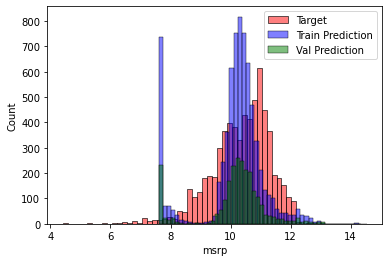

In [89]:
sns.histplot(np.log1p(y_pred),color = 'r', bins = 50, alpha = 0.5, label = 'Target')
sns.histplot(np.log1p(y_train), color = 'b', bins = 50 ,  alpha = 0.5, label = 'Train Prediction')

sns.histplot(np.log1p(y_val), color = 'g', bins = 50 ,  alpha = 0.5, label = 'Val Prediction')

plt.legend()
plt.show()

***
# WEEK 2.11

***

Feature Engineering

In [90]:
newest = df_train['year'].max()
oldest = df_train['year'].min()

In [91]:
oldest

1990

In [92]:
newest

2017

In [93]:
del df_train['age']

KeyError: 'age'

In [ ]:
def prepare_X(df,features):
    df = df.copy()
    df['age'] = df['year'].max() - df['year']
    
    features = features + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train  = prepare_X(df_train,base)

In [ ]:
X_train

In [ ]:
X_train  = prepare_X(df_train,base)

w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_validate,base)
y_val = df_validate['msrp']
y_pred = np.array(w0 + X_val.dot(w))

rmse(y_val,y_pred)


In [ ]:
sns.histplot(np.log1p(y_pred),color = 'r', bins = 50, alpha = 0.5, label = 'Target')
#sns.histplot(np.log1p(y_train), color = 'b', bins = 50 ,  alpha = 0.5, label = 'Train Prediction')

sns.histplot(np.log1p(y_val), color = 'g', bins = 50 ,  alpha = 0.5, label = 'Val Prediction')

plt.legend()
plt.show()

***
# WEEK 2.12

***

Categorical Variables

Categorical variables that appear like numerical variables like number of doors present a challenge. They should handled as multiple serieses that contain binary values. 

If number of doors is equal to 2, then the 2door series will have a 1, else it will have a 0.

If number of doors is equal to 4, then the 2door series will have a 0 and the 4door series will show a 1.

In [94]:
df_train['number_of_doors']

0       2.0
1       4.0
2       4.0
3       4.0
4       2.0
       ... 
7142    2.0
7143    2.0
7144    4.0
7145    4.0
7146    2.0
Name: number_of_doors, Length: 7147, dtype: float64

In [95]:
df_train['number_of_doors'] == 2

0        True
1       False
2       False
3       False
4        True
        ...  
7142     True
7143     True
7144    False
7145    False
7146     True
Name: number_of_doors, Length: 7147, dtype: bool

In [96]:
# converts T/F values to 0 and 1 values for the series
(df_train['number_of_doors'] == 2).astype('int')

0       1
1       0
2       0
3       0
4       1
       ..
7142    1
7143    1
7144    0
7145    0
7146    1
Name: number_of_doors, Length: 7147, dtype: int64

In [97]:
df_train['number_of_doors'].unique()

array([ 2.,  4.,  3., nan])

In [105]:
for val in [2,3,4]:
    df_train['doors_%s' %val] = (df_train['number_of_doors'] == val).astype('int')

In [111]:
del df_train['doors_4']

In [121]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = df['year'].max() - df['year']
    
    features.append('age')
    
    for val in [2,3,4]:
        df_train['doors_%s' %val] = (df_train['number_of_doors'] == val).astype('int')
        features.append('doors_%s' %val)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    print(df)
    return X

In [118]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train,y_train)


In [122]:
X_val = prepare_X(df_validate)

KeyError: "['doors_2', 'doors_3', 'doors_4'] not in index"

In [116]:
prepare_X(df_train)

array([[515.,  12.,  15., ...,   1.,   0.,   0.],
       [365.,   6.,  20., ...,   0.,   0.,   1.],
       [143.,   4.,  39., ...,   0.,   0.,   1.],
       ...,
       [184.,   4.,  37., ...,   0.,   0.,   1.],
       [325.,   6.,  25., ...,   0.,   0.,   1.],
       [167.,   4.,  28., ...,   1.,   0.,   0.]])

***
# WEEK 2.13

***

Regularization

***
# WEEK 2.14

***

Tuning the Model

***
# WEEK 2.15

***

Using the Model

***
# WEEK 2.16

***

Car Price Prediction Project Summary